In [1]:
#importing libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#importing dataset
zomato=pd.read_csv('zomato.csv',encoding='latin-1')

In [3]:
#checking shape 
zomato.shape

(9551, 21)

In [4]:
##checking info
zomato.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
Restaurant ID           9551 non-null int64
Restaurant Name         9551 non-null object
Country Code            9551 non-null int64
City                    9551 non-null object
Address                 9551 non-null object
Locality                9551 non-null object
Locality Verbose        9551 non-null object
Longitude               9551 non-null float64
Latitude                9551 non-null float64
Cuisines                9542 non-null object
Average Cost for two    9551 non-null int64
Currency                9551 non-null object
Has Table booking       9551 non-null object
Has Online delivery     9551 non-null object
Is delivering now       9551 non-null object
Switch to order menu    9551 non-null object
Price range             9551 non-null int64
Aggregate rating        9551 non-null float64
Rating color            9551 non-null object
Rating text             9551 non-null o

In [5]:
#checking corrleation of avg price with other
#note:here only columns having int datatypes will be showing coz avg price is int type of data
corr=zomato.corr()
corr
corr['Average Cost for two'].sort_values(ascending=False)

Average Cost for two    1.000000
Price range             0.075083
Votes                   0.067783
Aggregate rating        0.051792
Longitude               0.045891
Country Code            0.043225
Restaurant ID          -0.001693
Latitude               -0.111088
Name: Average Cost for two, dtype: float64

In [6]:
#checking data for different countries
zomato['Country Code'].value_counts()

1      8652
216     434
215      80
214      60
30       60
189      60
148      40
208      34
14       24
162      22
94       21
191      20
166      20
184      20
37        4
Name: Country Code, dtype: int64

In [7]:
#masking country code column which is equal to 1
n=zomato["Country Code"]==1
zomato=zomato[n]
zomato.shape

(8652, 21)

In [8]:
#checking data for different cities
zomato['City'].value_counts()

New Delhi       5473
Gurgaon         1118
Noida           1080
Faridabad        251
Ghaziabad         25
Bhubaneshwar      21
Lucknow           21
Ahmedabad         21
Guwahati          21
Amritsar          21
Indore            20
Jaipur            20
Ranchi            20
Bhopal            20
Kanpur            20
Nashik            20
Goa               20
Chennai           20
Mysore            20
Patna             20
Allahabad         20
Bangalore         20
Pune              20
Agra              20
Aurangabad        20
Kolkata           20
Varanasi          20
Puducherry        20
Nagpur            20
Vizag             20
Dehradun          20
Mangalore         20
Coimbatore        20
Vadodara          20
Ludhiana          20
Surat             20
Mumbai            20
Kochi             20
Chandigarh        18
Hyderabad         18
Secunderabad       2
Mohali             1
Panchkula          1
Name: City, dtype: int64

In [9]:
#masking cities
m=zomato['City']=='New Delhi'
n=zomato['City']=='Gurgaon'
p=zomato['City']=='Noida'
zomato=zomato[m|n|p]

In [10]:
#checking info again 
zomato.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7671 entries, 1161 to 9112
Data columns (total 21 columns):
Restaurant ID           7671 non-null int64
Restaurant Name         7671 non-null object
Country Code            7671 non-null int64
City                    7671 non-null object
Address                 7671 non-null object
Locality                7671 non-null object
Locality Verbose        7671 non-null object
Longitude               7671 non-null float64
Latitude                7671 non-null float64
Cuisines                7671 non-null object
Average Cost for two    7671 non-null int64
Currency                7671 non-null object
Has Table booking       7671 non-null object
Has Online delivery     7671 non-null object
Is delivering now       7671 non-null object
Switch to order menu    7671 non-null object
Price range             7671 non-null int64
Aggregate rating        7671 non-null float64
Rating color            7671 non-null object
Rating text             7671 non-nul

In [11]:
#taking only important columns
zomato=zomato[['Restaurant Name','Cuisines','Price range','Longitude','Latitude','Aggregate rating','Votes','Average Cost for two']]

In [12]:
#checking info 
zomato.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7671 entries, 1161 to 9112
Data columns (total 8 columns):
Restaurant Name         7671 non-null object
Cuisines                7671 non-null object
Price range             7671 non-null int64
Longitude               7671 non-null float64
Latitude                7671 non-null float64
Aggregate rating        7671 non-null float64
Votes                   7671 non-null int64
Average Cost for two    7671 non-null int64
dtypes: float64(3), int64(3), object(2)
memory usage: 539.4+ KB


In [13]:
#checking correlation of avg price  with other columns
corr=zomato.corr()
corr
corr['Average Cost for two'].sort_values(ascending=False)

Average Cost for two    1.000000
Price range             0.848425
Aggregate rating        0.329785
Votes                   0.297741
Longitude               0.071854
Latitude                0.070816
Name: Average Cost for two, dtype: float64

In [14]:
#assinging values of X
X=zomato.iloc[:,:-1].values
X[4]

array(['Cakes & More', 'Bakery', 1, 77.04200909999999, 28.511416200000003,
       3.0, 4], dtype=object)

In [15]:
#assigning value of y
y=zomato.iloc[:,-1]


In [16]:
##encoding and fitting
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
##handling categorical data
#label encoding for columns contain strings
labelencoder_y=LabelEncoder()
labelencoder_X=LabelEncoder()
##doing one hot encoding for categorical data  columns
X[:,0]=labelencoder_X.fit_transform(X[:,0]).astype(str)
X[:,1]=labelencoder_X.fit_transform(X[:,1]).astype(str)
onehotencoder_X=OneHotEncoder(categorical_features=[0,1])
X=onehotencoder_X.fit_transform(X).toarray()
y=labelencoder_y.fit_transform(y)


In [17]:
#logistic regression
l=range(598,600)
lst=[]
for j in l:
    #splitting data (train->75%,test->25%)
    from sklearn.cross_validation import train_test_split
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=j)
    #applying algorithm
    from sklearn.linear_model import LogisticRegression
    clf2=LogisticRegression()
    clf2.fit(X_train,y_train)
    y_pred2=clf2.predict(X_test)
    #calculating score
    from sklearn.metrics import accuracy_score
    lst.append(accuracy_score(y_test,y_pred2))
print('accuracy',round(max(lst),4)*100,j)

/root/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


accuracy 39.519999999999996 599


In [18]:
#calculation of r2_score
from sklearn.ensemble import RandomForestRegressor
forest=RandomForestRegressor(n_estimators=20)
forest.fit(X_train,y_train)
from sklearn import metrics
y_pred=forest.predict(X_test)
metrics.r2_score(y_test,y_pred)

0.9047561544891166

/root/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


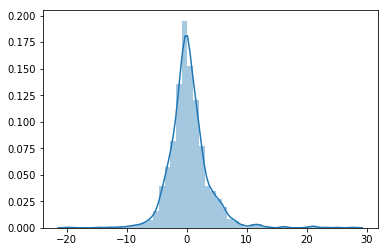

In [19]:
#checking smoothness of curve
sns.distplot(y_test-y_pred)